Import all the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

Load the data

Training Samples -> 60k

Testing Samples -> 10k

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data Preprocessing

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

Define the model

In [ ]:
model = Sequential([
    # step 1: create a convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # step 2: flatten the layer ti create fully connected neural networ
    Flatten(),

    # step 3: hidden layer
    Dense(128, activation='relu'),

    # step 4: output layer
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.8928 - loss: 0.3637
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9819 - loss: 0.0611
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9884 - loss: 0.0384
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9916 - loss: 0.0275
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9942 - loss: 0.0198
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9963 - loss: 0.0131
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9975 - loss: 0.0092
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9978 - loss: 0.0075
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9976 - loss: 0.0068
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9989 - loss: 0.0038


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0698


In [ ]:
print(test_acc)

0.9851999878883362


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


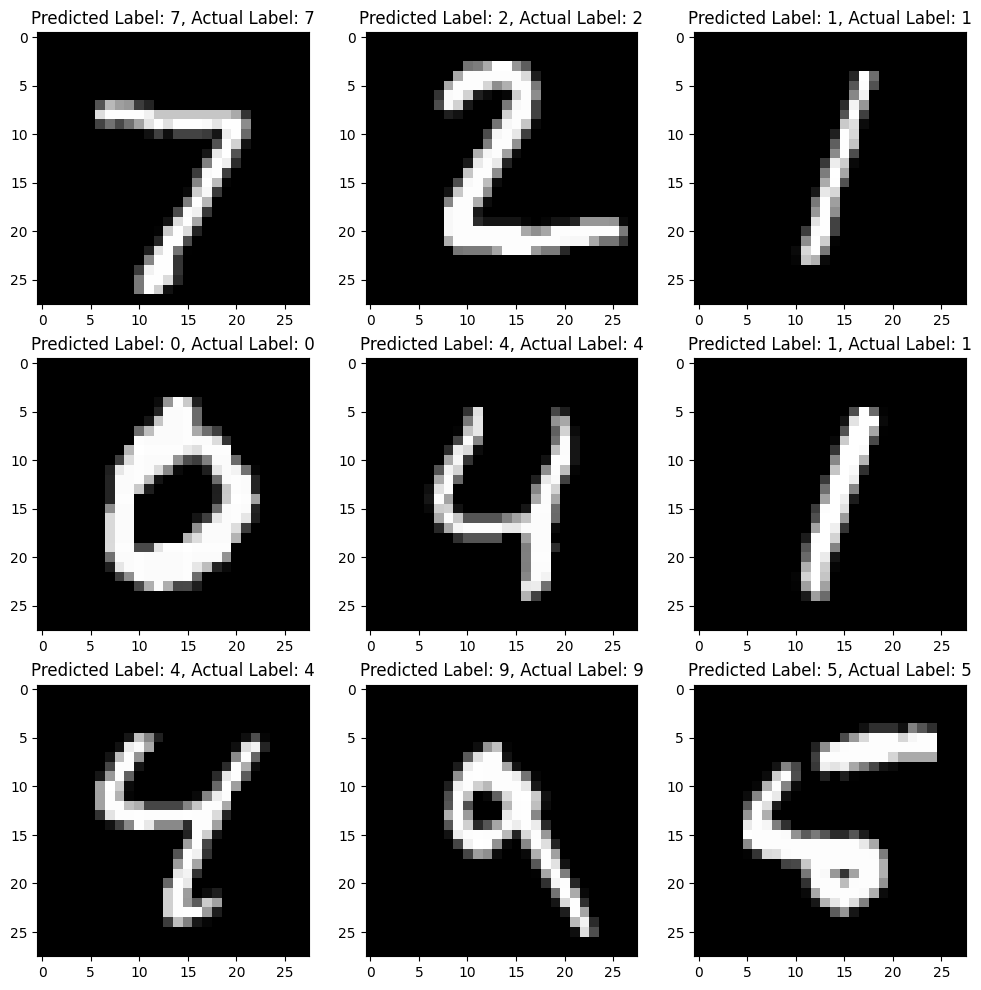

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test[:9]) # predict 9 images
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted Label: {predicted_labels[i]}, Actual Label: {y_test[i]}")
plt.show()

In [ ]:
model.save('mnist_cnn_model.h5')